In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imsave
%matplotlib inline  
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from pycochleagram import cochleagram as cgram
from pycochleagram import erbfilter as erb
from pycochleagram import utils
from scipy.signal import welch, decimate, resample
import argparse
import os
from random import choice
from time import sleep, time

In [3]:
audio_name = 'male_s4_600'
audio_path = '../data/audio/'+audio_name+'.wav'
ipd.Audio(audio_path)


audio, sr = librosa.load(audio_path,duration=600)
audio_dur = librosa.get_duration(y=audio,sr=sr)


In [4]:
print(len(audio)/sr)

600.0


22050


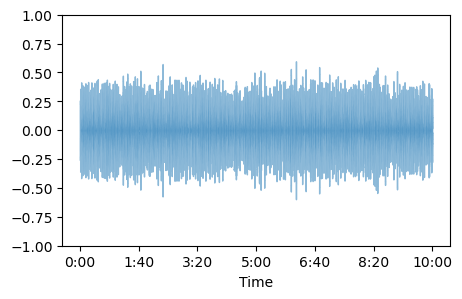

In [29]:
print(sr)
plt.figure(figsize=(5,3))
librosa.display.waveshow(audio,alpha=0.5,)
plt.ylim(-1,1)
plt.show()

In [5]:
### split audio to segments (300ms)

split_time = 300
num_seg = audio_dur * 1000 / split_time

sp_idx = np.arange(1,num_seg)* sr * split_time / 1000
sp_idx = sp_idx.astype(int)
audio_seg = np.split(audio,sp_idx)
print(audio_seg[-1])

[ 7.3286863e-03  7.3619843e-03  7.1789417e-03 ... -5.9403342e-06
  4.8255852e-06 -4.0261307e-06]


In [31]:
## construct coch
imag_size = 256
imag_arr = np.empty((0,imag_size,imag_size))
#### for each audio
for i,s_audio in enumerate(audio_seg):
    sample_factor=4
    downsample=1000 # dowsample to 200 HZ
    nonlinearity=None # db, power
    n = 50  # default filter for low_lim=50 hi_lim=20000
    low_lim = 30  # this is the default for cochleagram.human_cochleagram ### modified
    hi_lim = 7860  # this is the default for cochleagram.human_cochleagram
    # # 3/10 power compression
    coch_pow = cgram.human_cochleagram(s_audio, sr, n, sample_factor=sample_factor, \
        downsample=downsample, nonlinearity='power', strict=False)
    tmp = resample(coch_pow,imag_size,domain='freq')
    tmp = resample(tmp.T,imag_size,domain='time').T
    imag_arr = np.append(imag_arr, np.array([tmp]), axis=0)
    imag_name = audio_name + '_' + str(i) + '.png'
    imag_path = '../data/images/' + audio_name + '/' + imag_name
    imsave(imag_path, tmp)
    print(imag_name + ' saved ...')

here
male_s4_0.png saved ...
here
male_s4_1.png saved ...
here
male_s4_2.png saved ...
here
male_s4_3.png saved ...
here
male_s4_4.png saved ...
here
male_s4_5.png saved ...
here
male_s4_6.png saved ...
here
male_s4_7.png saved ...
here
male_s4_8.png saved ...
here
male_s4_9.png saved ...
here
male_s4_10.png saved ...
here
male_s4_11.png saved ...
here
male_s4_12.png saved ...
here
male_s4_13.png saved ...
here
male_s4_14.png saved ...
here
male_s4_15.png saved ...
here
male_s4_16.png saved ...
here
male_s4_17.png saved ...
here
male_s4_18.png saved ...
here
male_s4_19.png saved ...
here
male_s4_20.png saved ...
here
male_s4_21.png saved ...
here
male_s4_22.png saved ...
here
male_s4_23.png saved ...
here
male_s4_24.png saved ...
here
male_s4_25.png saved ...
here
male_s4_26.png saved ...
here
male_s4_27.png saved ...
here
male_s4_28.png saved ...
here
male_s4_29.png saved ...
here
male_s4_30.png saved ...
here
male_s4_31.png saved ...
here
male_s4_32.png saved ...
here
male_s4_33.png 

male_s4_268.png saved ...
here
male_s4_269.png saved ...
here
male_s4_270.png saved ...
here
male_s4_271.png saved ...
here
male_s4_272.png saved ...
here
male_s4_273.png saved ...
here
male_s4_274.png saved ...
here
male_s4_275.png saved ...
here
male_s4_276.png saved ...
here
male_s4_277.png saved ...
here
male_s4_278.png saved ...
here
male_s4_279.png saved ...
here
male_s4_280.png saved ...
here
male_s4_281.png saved ...
here
male_s4_282.png saved ...
here
male_s4_283.png saved ...
here
male_s4_284.png saved ...
here
male_s4_285.png saved ...
here
male_s4_286.png saved ...
here
male_s4_287.png saved ...
here
male_s4_288.png saved ...
here
male_s4_289.png saved ...
here
male_s4_290.png saved ...
here
male_s4_291.png saved ...
here
male_s4_292.png saved ...
here
male_s4_293.png saved ...
here
male_s4_294.png saved ...
here
male_s4_295.png saved ...
here
male_s4_296.png saved ...
here
male_s4_297.png saved ...
here
male_s4_298.png saved ...
here
male_s4_299.png saved ...
here
male_s4_

male_s4_533.png saved ...
here
male_s4_534.png saved ...
here
male_s4_535.png saved ...
here
male_s4_536.png saved ...
here
male_s4_537.png saved ...
here
male_s4_538.png saved ...
here
male_s4_539.png saved ...
here
male_s4_540.png saved ...
here
male_s4_541.png saved ...
here
male_s4_542.png saved ...
here
male_s4_543.png saved ...
here
male_s4_544.png saved ...
here
male_s4_545.png saved ...
here
male_s4_546.png saved ...
here
male_s4_547.png saved ...
here
male_s4_548.png saved ...
here
male_s4_549.png saved ...
here
male_s4_550.png saved ...
here
male_s4_551.png saved ...
here
male_s4_552.png saved ...
here
male_s4_553.png saved ...
here
male_s4_554.png saved ...
here
male_s4_555.png saved ...
here
male_s4_556.png saved ...
here
male_s4_557.png saved ...
here
male_s4_558.png saved ...
here
male_s4_559.png saved ...
here
male_s4_560.png saved ...
here
male_s4_561.png saved ...
here
male_s4_562.png saved ...
here
male_s4_563.png saved ...
here
male_s4_564.png saved ...
here
male_s4_

male_s4_798.png saved ...
here
male_s4_799.png saved ...
here
male_s4_800.png saved ...
here
male_s4_801.png saved ...
here
male_s4_802.png saved ...
here
male_s4_803.png saved ...
here
male_s4_804.png saved ...
here
male_s4_805.png saved ...
here
male_s4_806.png saved ...
here
male_s4_807.png saved ...
here
male_s4_808.png saved ...
here
male_s4_809.png saved ...
here
male_s4_810.png saved ...
here
male_s4_811.png saved ...
here
male_s4_812.png saved ...
here
male_s4_813.png saved ...
here
male_s4_814.png saved ...
here
male_s4_815.png saved ...
here
male_s4_816.png saved ...
here
male_s4_817.png saved ...
here
male_s4_818.png saved ...
here
male_s4_819.png saved ...
here
male_s4_820.png saved ...
here
male_s4_821.png saved ...
here
male_s4_822.png saved ...
here
male_s4_823.png saved ...
here
male_s4_824.png saved ...
here
male_s4_825.png saved ...
here
male_s4_826.png saved ...
here
male_s4_827.png saved ...
here
male_s4_828.png saved ...
here
male_s4_829.png saved ...
here
male_s4_

male_s4_1061.png saved ...
here
male_s4_1062.png saved ...
here
male_s4_1063.png saved ...
here
male_s4_1064.png saved ...
here
male_s4_1065.png saved ...
here
male_s4_1066.png saved ...
here
male_s4_1067.png saved ...
here
male_s4_1068.png saved ...
here
male_s4_1069.png saved ...
here
male_s4_1070.png saved ...
here
male_s4_1071.png saved ...
here
male_s4_1072.png saved ...
here
male_s4_1073.png saved ...
here
male_s4_1074.png saved ...
here
male_s4_1075.png saved ...
here
male_s4_1076.png saved ...
here
male_s4_1077.png saved ...
here
male_s4_1078.png saved ...
here
male_s4_1079.png saved ...
here
male_s4_1080.png saved ...
here
male_s4_1081.png saved ...
here
male_s4_1082.png saved ...
here
male_s4_1083.png saved ...
here
male_s4_1084.png saved ...
here
male_s4_1085.png saved ...
here
male_s4_1086.png saved ...
here
male_s4_1087.png saved ...
here
male_s4_1088.png saved ...
here
male_s4_1089.png saved ...
here
male_s4_1090.png saved ...
here
male_s4_1091.png saved ...
here
male_s4_

male_s4_1318.png saved ...
here
male_s4_1319.png saved ...
here
male_s4_1320.png saved ...
here
male_s4_1321.png saved ...
here
male_s4_1322.png saved ...
here
male_s4_1323.png saved ...
here
male_s4_1324.png saved ...
here
male_s4_1325.png saved ...
here
male_s4_1326.png saved ...
here
male_s4_1327.png saved ...
here
male_s4_1328.png saved ...
here
male_s4_1329.png saved ...
here
male_s4_1330.png saved ...
here
male_s4_1331.png saved ...
here
male_s4_1332.png saved ...
here
male_s4_1333.png saved ...
here
male_s4_1334.png saved ...
here
male_s4_1335.png saved ...
here
male_s4_1336.png saved ...
here
male_s4_1337.png saved ...
here
male_s4_1338.png saved ...
here
male_s4_1339.png saved ...
here
male_s4_1340.png saved ...
here
male_s4_1341.png saved ...
here
male_s4_1342.png saved ...
here
male_s4_1343.png saved ...
here
male_s4_1344.png saved ...
here
male_s4_1345.png saved ...
here
male_s4_1346.png saved ...
here
male_s4_1347.png saved ...
here
male_s4_1348.png saved ...
here
male_s4_

male_s4_1575.png saved ...
here
male_s4_1576.png saved ...
here
male_s4_1577.png saved ...
here
male_s4_1578.png saved ...
here
male_s4_1579.png saved ...
here
male_s4_1580.png saved ...
here
male_s4_1581.png saved ...
here
male_s4_1582.png saved ...
here
male_s4_1583.png saved ...
here
male_s4_1584.png saved ...
here
male_s4_1585.png saved ...
here
male_s4_1586.png saved ...
here
male_s4_1587.png saved ...
here
male_s4_1588.png saved ...
here
male_s4_1589.png saved ...
here
male_s4_1590.png saved ...
here
male_s4_1591.png saved ...
here
male_s4_1592.png saved ...
here
male_s4_1593.png saved ...
here
male_s4_1594.png saved ...
here
male_s4_1595.png saved ...
here
male_s4_1596.png saved ...
here
male_s4_1597.png saved ...
here
male_s4_1598.png saved ...
here
male_s4_1599.png saved ...
here
male_s4_1600.png saved ...
here
male_s4_1601.png saved ...
here
male_s4_1602.png saved ...
here
male_s4_1603.png saved ...
here
male_s4_1604.png saved ...
here
male_s4_1605.png saved ...
here
male_s4_

male_s4_1832.png saved ...
here
male_s4_1833.png saved ...
here
male_s4_1834.png saved ...
here
male_s4_1835.png saved ...
here
male_s4_1836.png saved ...
here
male_s4_1837.png saved ...
here
male_s4_1838.png saved ...
here
male_s4_1839.png saved ...
here
male_s4_1840.png saved ...
here
male_s4_1841.png saved ...
here
male_s4_1842.png saved ...
here
male_s4_1843.png saved ...
here
male_s4_1844.png saved ...
here
male_s4_1845.png saved ...
here
male_s4_1846.png saved ...
here
male_s4_1847.png saved ...
here
male_s4_1848.png saved ...
here
male_s4_1849.png saved ...
here
male_s4_1850.png saved ...
here
male_s4_1851.png saved ...
here
male_s4_1852.png saved ...
here
male_s4_1853.png saved ...
here
male_s4_1854.png saved ...
here
male_s4_1855.png saved ...
here
male_s4_1856.png saved ...
here
male_s4_1857.png saved ...
here
male_s4_1858.png saved ...
here
male_s4_1859.png saved ...
here
male_s4_1860.png saved ...
here
male_s4_1861.png saved ...
here
male_s4_1862.png saved ...
here
male_s4_

ValueError: Choose `env_sr` and `audio_sr` such that the number of samples after polyphase resampling is an integer
(length: 2602, env_sr: 1000, audio_sr: 22050 !--> 118.00453514739229

In [10]:
np.save('../data/'+audio_name+'_imags.npy',imag_arr)

## Seperate to train and test

In [1]:
import numpy as np

In [3]:
female_imags = np.load("../data/female_s1_imags.npy")
male_images = np.load("../data/male_s4_600_imags.npy")

In [5]:
print(female_eeg_data.shape,male_eeg_data.shape)

(64, 60101) (64, 60101)


In [10]:
num_train = int(len(female_imags) * 0.7)
idx = np.arange(len(female_imags))
np.random.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]

In [11]:
train_female_imags = female_imags[train_idx]
train_male_imags = male_images[train_idx]
train_imags = np.concatenate((train_female_imags, train_male_imags), axis=0)

test_female_imags = female_imags[test_idx]
test_male_imags = male_images[test_idx]
test_imags = np.concatenate((test_female_imags, test_male_imags), axis=0)
np.save("../data/train/coch_imags.npy",train_imags)
np.save("../data/train/indices.npy",train_idx)
np.save("../data/test/coch_imags.npy",test_imags)
np.save("../data/test/indices.npy",test_idx)

In [13]:
female_eeg_data = np.load("../data/subj1_single_f.npy").T[:60000]
male_eeg_data = np.load("../data/subj1_single_m.npy").T[:60000]

num_times = 30
num_channels = 64
train_female_eeg_data = female_eeg_data.reshape(-1,num_channels*num_times)[train_idx].reshape(-1,num_channels)
train_male_eeg_data = male_eeg_data.reshape(-1,num_channels*num_times)[train_idx].reshape(-1,num_channels)
train_eeg_data = np.concatenate((train_female_eeg_data, train_male_eeg_data), axis=0)

test_female_eeg_data = female_eeg_data.reshape(-1,num_channels*num_times)[test_idx].reshape(-1,num_channels)
test_male_eeg_data = male_eeg_data.reshape(-1,num_channels*num_times)[test_idx].reshape(-1,num_channels)
test_eeg_data = np.concatenate((test_female_eeg_data, test_male_eeg_data), axis=0)

np.save("../data/train/eeg_data.npy",train_eeg_data)
np.save("../data/test/eeg_data.npy",test_eeg_data)

print(test_eeg_data.shape)
print(train_eeg_data.shape)

(36000, 64)


NameError: name 'train_egg_data' is not defined

In [14]:
print(train_eeg_data.shape)

(84000, 64)
